In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score  # we are working on classification based problem thats why we are going for acc_scr and not MSE



#### Data Collection & Analysis 

In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


###### 1 ---> Diabetic
###### 0 ---> Non-Diabetic

In [3]:
#statistical data of above dataset
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

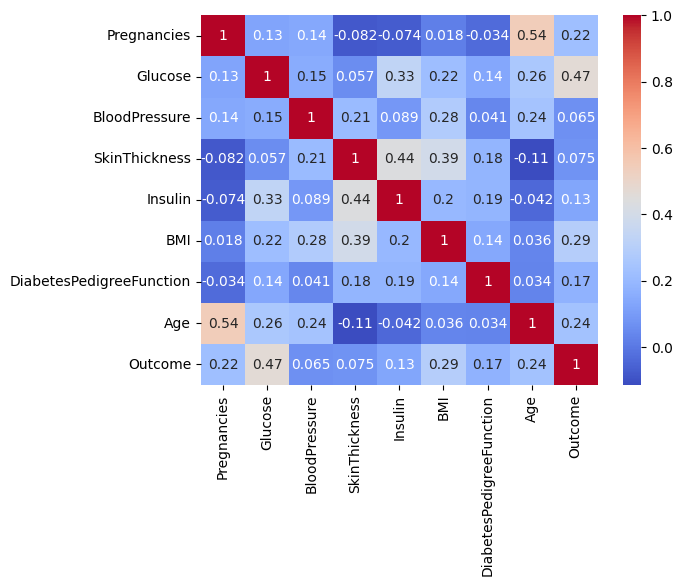

In [5]:
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [6]:
#Features and Target
X = dataset.drop(columns='Outcome', axis=1)
Y = dataset['Outcome']

In [7]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

#### Data Standardization

In [9]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [10]:
X_std

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [11]:
X = X_std

In [12]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2, stratify=Y)  #stratify to output result in proportion

In [13]:
# Training Model
classfier = svm.SVC(kernel='linear')

In [14]:
classfier.fit(X_train,Y_train)

SVC(kernel='linear')

#### Model Evalution (Accuracy Score)

In [15]:
x_train_pred = classfier.predict(X_train)

In [16]:
training_data_acc_score = accuracy_score(x_train_pred, Y_train)

In [17]:
print(f"Accuracy score of the trainig data: {training_data_acc_score} ")
#Out of 100 prediction our model is able to predict 78% correctly.

Accuracy score of the trainig data: 0.7866449511400652 


In [18]:
# Acc score for the test set
x_test_pred = classfier.predict(X_test)
test_data_acc_score = accuracy_score(x_test_pred, Y_test)

In [19]:
print(f"Accuracy score of the trainig data: {test_data_acc_score} ")

Accuracy score of the trainig data: 0.7727272727272727 


### Making a Predictive System

In [20]:
input_data = (6,148,72,35,0,33.6,0.627,50)

#changing data to np_array
inp_np_array = np.asarray(input_data)

#reshaping the array for one instance as our model is trained for 768 data points
inp_np_array_reshape  = inp_np_array.reshape(1,-1)

# we need to stdiz our data we cant feed it raw data otherwise acc score may dec
inp_std = scaler.transform(inp_np_array_reshape)
inp_std


C:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ]])

In [21]:
prediction = classfier.predict(inp_std)
prediction

array([1], dtype=int64)

In [22]:
if prediction[0]==0:
    print('Person is Non-Diabetic')
else:
    print('Person is Diabetic')

Person is Diabetic
